The purpose of these notebooks was to study the global geometry of events from the HK_2022_e61 version (from B. Quilain) in order to understand the complexity to reproduce the performances of GRANT obtained by C. Quach regarding classification and regressions tasks.

---

(27/11/2024) This notebook deals with data from __the HyperK_hybrid_mpMTs__ from WCSim #12.2, from the 'new' wcsimroot_to_root 
             on __raw__ data.

- eventType, energie, nb_hits, vertex (Time, 3d, 2d, start & stop)
- charge, time (raw), hits

# Init

In [2]:
import numpy as np

import awkward as ak
import uproot as uproot

import matplotlib.pyplot as plt
import seaborn as sns

import pprint as pprint

In [4]:
file_path = "/home/amaterasu/work/cm_meeting_hk/datasets/toygeom_v1_e20k_mu20k_raw.root"

# Use uproot.concatenate to merge data in memory as an Awkward Array
file = uproot.open(file_path)
print(f"File keys :  \n{file.keys()}")

tree_name = 'pure_root_tree'
tree = file[tree_name]
pprint.pprint(f"Tree keys :  \n{tree.keys()}")

File keys :  
['pure_root_tree;1']
('Tree keys :  \n'
 "['eventType', 'event_id', 'creator_process_name', 'nb_triggers_in_event', "
 "'n_digits', 'trigger_time', 'trigger_type', 'energy', 'vertex', "
 "'vertex_time', 'particleDir', 'particleStart', 'particleStop', 'n_hits', "
 "'tubeIds', 'hitx', 'hity', 'hitz', 'charge', 'time']")


In [5]:
# file_paths = [
#     '/sps/t2k/eleblevec/datasets/wcsimroot_datasets/hk/muon/1/HK_NomPMTs_SDO_100_1kMeV_10kevents_mu_1.root',
#     '/sps/t2k/eleblevec/datasets/wcsimroot_datasets/hk/muon/2/HK_NomPMTs_SDO_100_1kMeV_10kevents_mu_2.root',
#     '/sps/t2k/eleblevec/datasets/wcsimroot_datasets/hk/muon/3/HK_NomPMTs_SDO_100_1kMeV_10kevents_mu_3.root',
#     '/sps/t2k/eleblevec/datasets/wcsimroot_datasets/hk/muon/4/HK_NomPMTs_SDO_100_1kMeV_10kevents_mu_4.root',
# ]

# # Use uproot.concatenate to merge data in memory as an Awkward Array
# tree = uproot.concatenate(
#     [f"{file_path}:pure_root_tree" for file_path in file_paths],
#     library="ak",  # Awkward Array library
# )

# print(f"Tree keys :  \n{tree.fields}")

# Event level

## Event type

In [6]:
np.unique(tree['eventType'].array(), return_counts=True)

<Array [[11], [40000]] type='2 * var * int64'>

## Energy

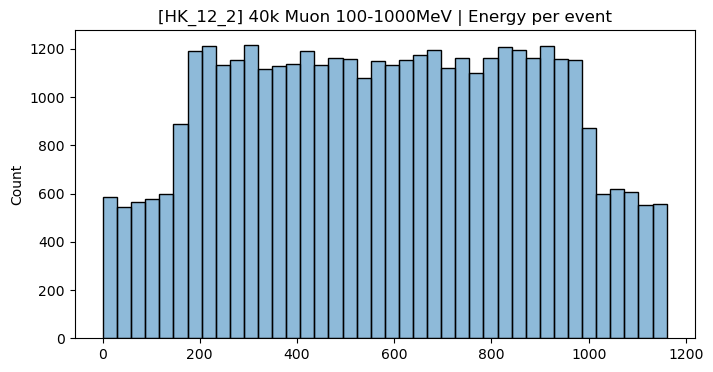

In [7]:
energy = tree['energy'].array()

fig_title = '[HK_12_2] 40k Muon 100-1000MeV | Energy per event'
log_scale=False
alpha=0.5

# Plots nb_hits histograms
plt.figure(figsize=(8, 4))


plt.title(fig_title)
sns.histplot(energy, 
             alpha=alpha,
             log_scale=log_scale
)

plt.show()

## Number of hits

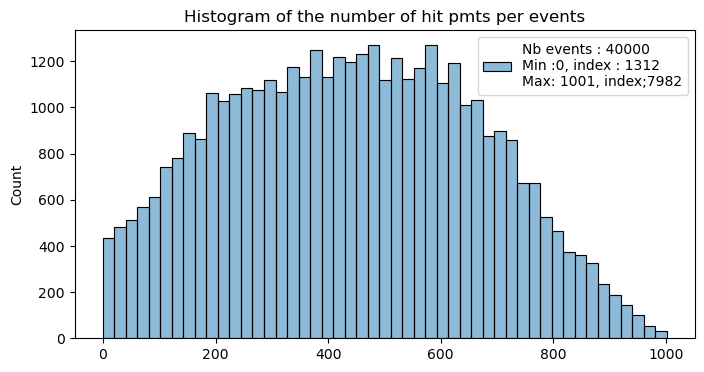

In [103]:
log_scale=False
alpha=0.5


nb_hits = tree['n_hits'].array()
list_nb_hits = [nb_hit for nb_hit in nb_hits] # to use .index on

# Find minimum and maximum values of nb_hits + get the index of associated event
min_value, max_value = min(nb_hits), max(nb_hits)
min_index, max_index = list_nb_hits.index(min_value), list_nb_hits.index(max_value)

# Plots nb_hits histograms
plt.figure(figsize=(8, 4))

plt.title('Histogram of the number of hit pmts per events')
sns.histplot(nb_hits, 
             label=f"Nb events : {len(nb_hits)} \nMin :{min_value}, index : {min_index} \nMax: {max_value}, index;{max_index}",
             alpha=alpha,
             log_scale=log_scale
)

plt.legend()
plt.show()

In [110]:
np.unique(tree['eventType'].array(), return_counts=True)

<Array [[11], [40000]] type='2 * var * int64'>

In [111]:
len(nb_hits[ nb_hits > 50])

38834

## Vertices

In [22]:
vertex = tree['vertex'].array()

###  -- Trigger Time

In [17]:
trigger_time = tree['trigger_time'].array()

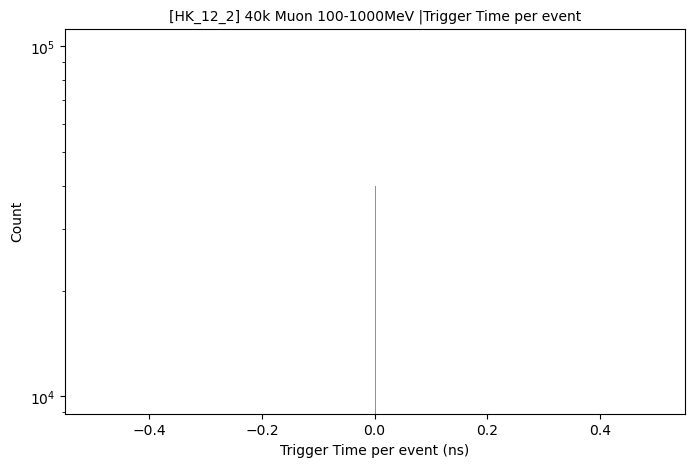

In [18]:
fig_title = '[HK_12_2] 40k Muon 100-1000MeV |Trigger Time per event'

figure = plt.figure(figsize=(8, 5))
plt.title(fig_title, fontsize=10)

plt.hist(trigger_time, bins=400, alpha=0.7)
plt.xlabel('Trigger Time per event (ns)')
plt.ylabel('Count')

plt.yscale('log')
#plt.ylim(4000, 2e6)

plt.show()

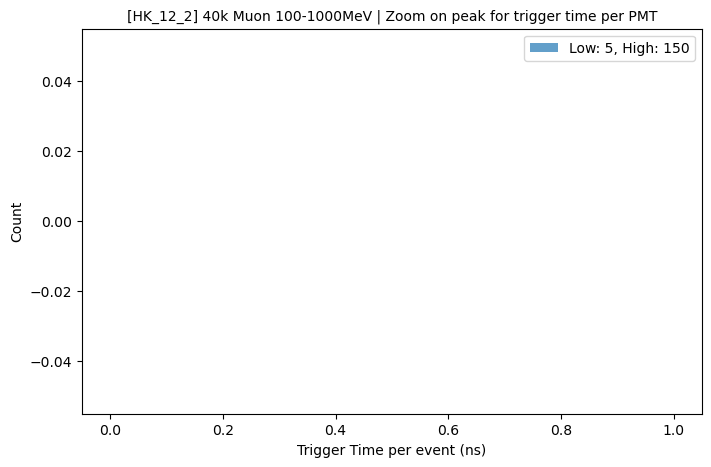

In [19]:
low_value, high_value = 5, 150
peak_zoomed_time = trigger_time[ ( trigger_time > low_value ) * ( trigger_time < high_value ) ]

fig_title = '[HK_12_2] 40k Muon 100-1000MeV | Zoom on peak for trigger time per PMT'
figure = plt.figure(figsize=(8, 5))
plt.title(fig_title, fontsize=10)

plt.hist(peak_zoomed_time, bins=700, alpha=0.7, label=f'Low: {low_value}, High: {high_value}')
plt.xlabel('Trigger Time per event (ns)')
plt.ylabel('Count')

#plt.ylim(4000, 2e6)
plt.legend()
plt.show()


### -- Position

In [25]:
v_x, v_y, v_z = vertex[:,0].to_numpy(), vertex[:,1].to_numpy(), vertex[:,2].to_numpy()

edges_x, edges_y, edges_z = np.histogram_bin_edges(v_x, bins='auto'), np.histogram_bin_edges(v_y, bins='auto'), np.histogram_bin_edges(v_z, bins='auto')

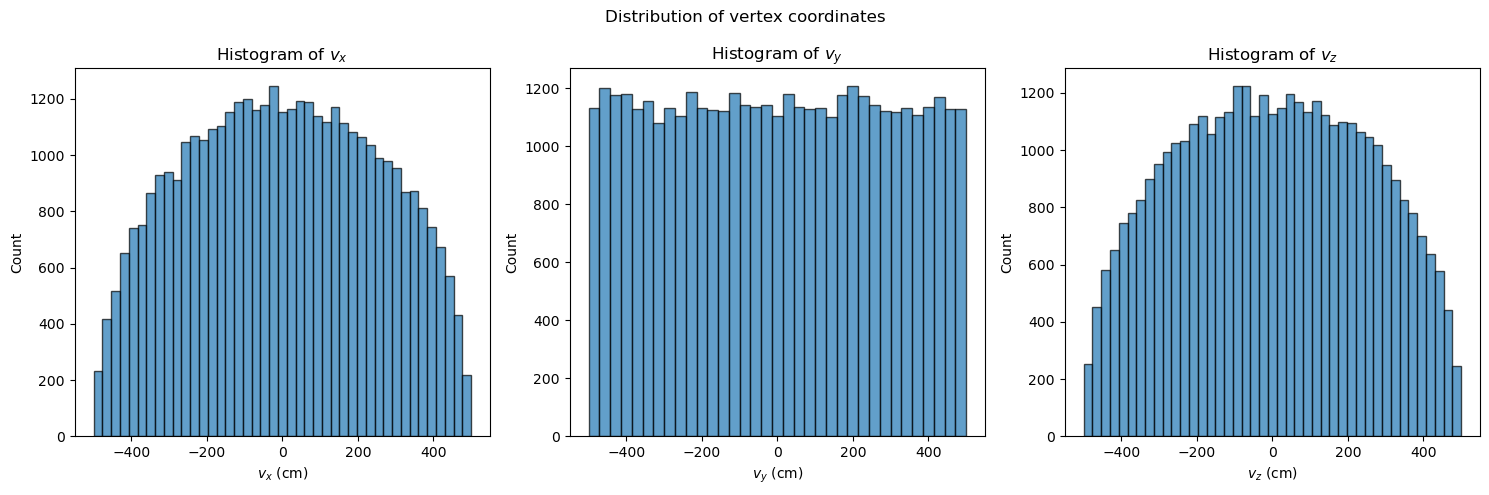

In [26]:
alpha = 0.7


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(v_x, bins=edges_x, alpha=alpha, edgecolor='black')
plt.xlabel(r'$v_x$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $v_x$')

plt.subplot(1, 3, 2)
plt.hist(v_y, bins=edges_y, alpha=alpha, edgecolor='black')
plt.xlabel(r'$v_y$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $v_y$')

plt.subplot(1, 3, 3)
plt.hist(v_z, bins=edges_z, alpha=alpha, edgecolor='black')
plt.xlabel(r'$v_z$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $v_z$')

plt.suptitle('Distribution of vertex coordinates')
plt.tight_layout()
plt.show()

### -- Angles

In [27]:
theta = np.arccos(v_z / np.sqrt(v_x**2 + v_y**2 + v_z**2))
phi = np.arctan2(v_y, v_x)

edges_theta = np.histogram_bin_edges(theta, bins='auto')
edges_phi = np.histogram_bin_edges(phi, bins='auto')

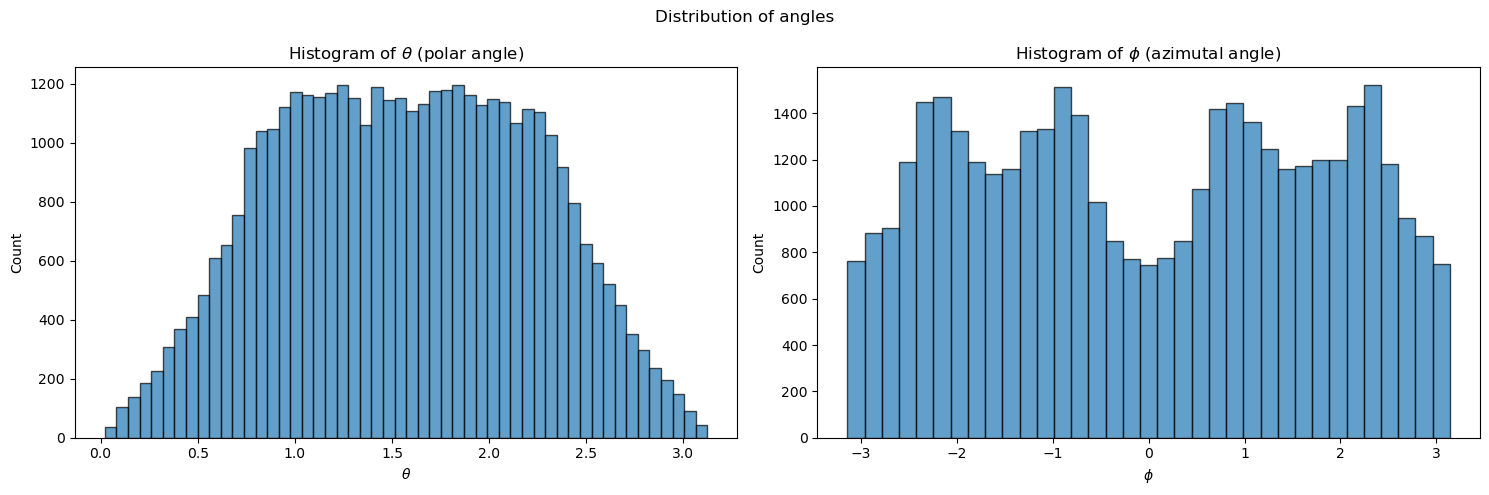

In [28]:
alpha = 0.7

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(theta, bins=edges_theta, alpha=alpha, edgecolor='black')
plt.xlabel(r'$\theta$')
plt.ylabel('Count')
plt.title(r'Histogram of $\theta$ (polar angle)')

plt.subplot(1, 2, 2)
plt.hist(phi, bins=edges_phi, alpha=alpha, edgecolor='black')
plt.xlabel(r'$\phi$')
plt.ylabel('Count')
plt.title(r'Histogram of $\phi$ (azimutal angle)')

plt.suptitle('Distribution of angles')
plt.tight_layout()
plt.show()

### -- xOy Vertex norm

In [29]:
v2D2 = v_x**2 + v_y**2

edges_v2D2 = np.histogram_bin_edges(v2D2, bins='auto')

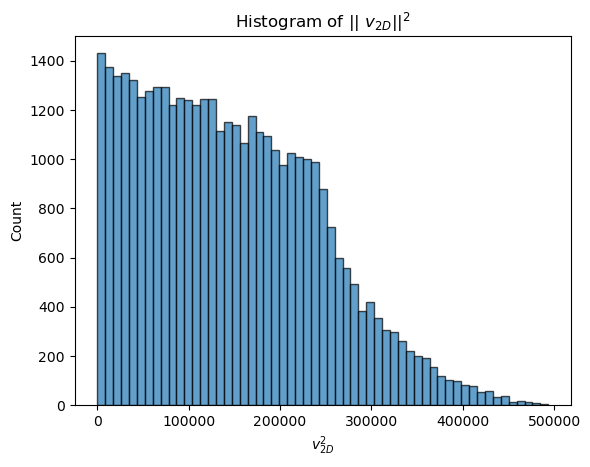

In [30]:
plt.hist(v2D2, bins=edges_v2D2, alpha=0.7, edgecolor='black')
plt.xlabel(r'$v_{2D}^2$')
plt.ylabel('Count')
plt.title(r'Histogram of || $v_{2D} ||^2$')
plt.show()

### -- xOy vertex projection : Hexagonal 

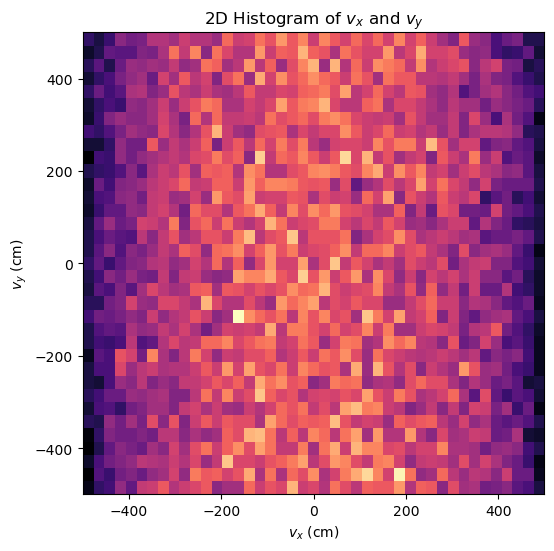

In [32]:
fig, ax = plt.subplots(1, figsize=(6,6))

plt.hist2d(v_x, v_y, bins=[edges_x, edges_y], cmap='magma')

plt.xlabel(r'$v_x$ (cm)')
plt.ylabel(r'$v_y$ (cm)')
plt.title(r'2D Histogram of $v_x$ and $v_y$')

ax.set_aspect('equal')
plt.show()

### -- xOy vertex projection : Kde 

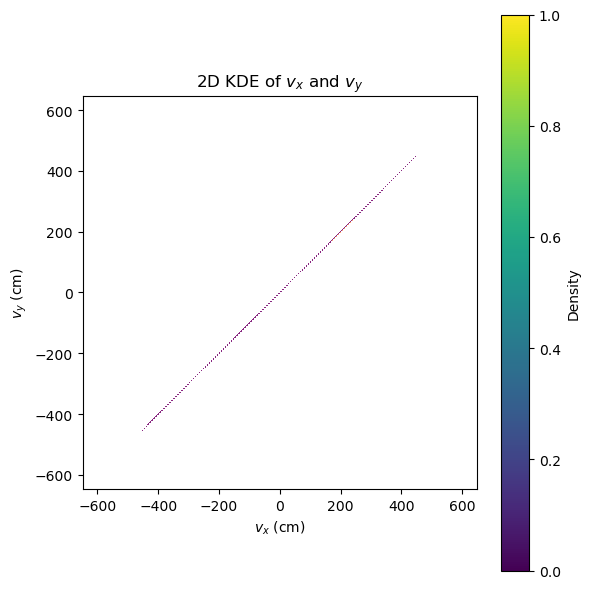

In [33]:
fig, ax = plt.subplots(1, figsize=(6, 6))

# Create the KDE plot using seaborn
kde = sns.kdeplot(
    x=v_y, 
    y=v_y, 
    fill=True, 
    cmap='magma',  
    ax=ax,       
    thresh=0.1
)

ax.set_xlabel(r'$v_x$ (cm)')
ax.set_ylabel(r'$v_y$ (cm)')
ax.set_title(r'2D KDE of $v_x$ and $v_y$')

# Add a color bar for the density
mappable = kde.get_children()[0]  # Access the density color map
fig.colorbar(mappable, ax=ax, label='Density')

ax.set_aspect('equal')

plt.tight_layout()
plt.show()

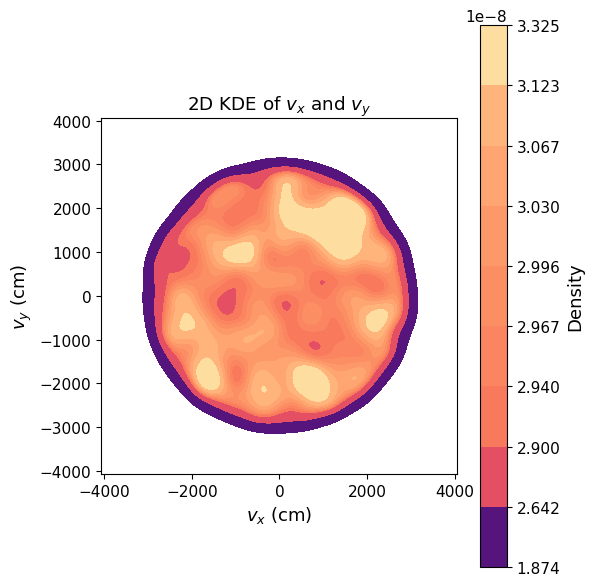

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 6))

# Create the KDE plot using seaborn
kde = sns.kdeplot(
    x=v_x.to_numpy(), 
    y=v_y.to_numpy(), 
    fill=True, 
    cmap='magma',  
    ax=ax,       
    thresh=0.1
)

ax.set_xlabel(r'$v_x$ (cm)')
ax.set_ylabel(r'$v_y$ (cm)')
ax.set_title(r'2D KDE of $v_x$ and $v_y$')

# Add a color bar for the density
mappable = kde.get_children()[0]  # Access the density color map
fig.colorbar(mappable, ax=ax, label='Density')

ax.set_aspect('equal')

plt.tight_layout()
plt.show()

### -- Particle Start and Stop

In [ ]:
particle_start = tree['particleStart']

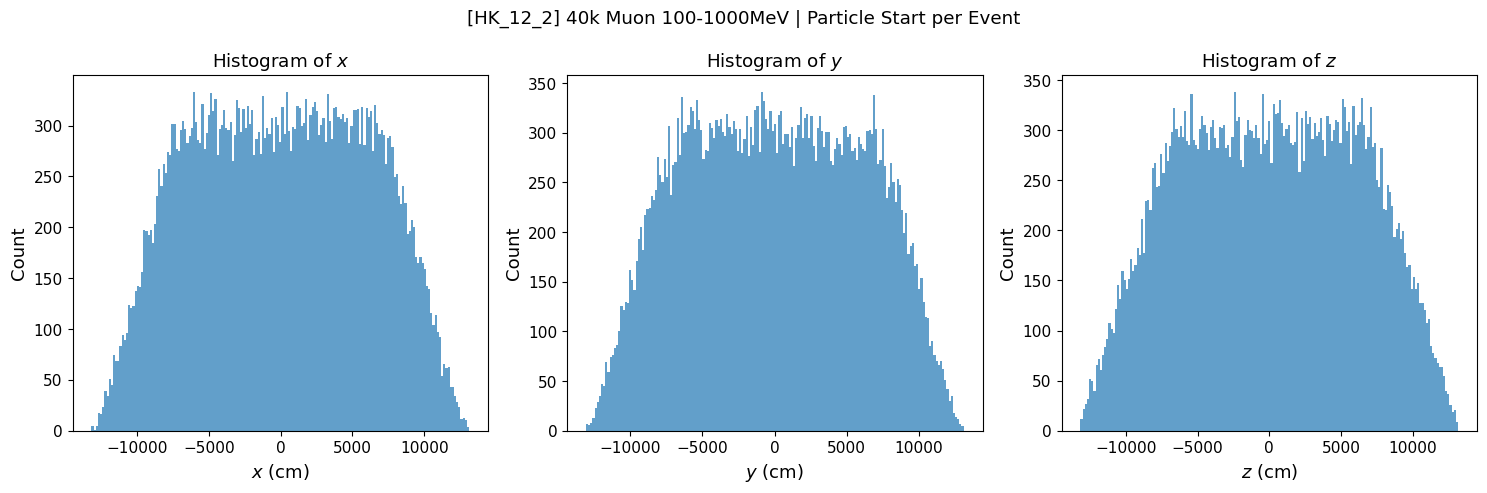

In [ ]:
fig_title = '[HK_12_2] 40k Muon 100-1000MeV | Particle Start per Event'

alpha=0.7
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(particle_start[:, 0], bins=175, alpha=0.7)
plt.xlabel(r'$x$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $x$')

plt.subplot(1, 3, 2)
plt.hist(particle_start[:, 1], bins=175, alpha=0.7)
plt.xlabel(r'$y$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $y$')

plt.subplot(1, 3, 3)
plt.hist(particle_start[:, 2], bins=175, alpha=0.7)
plt.xlabel(r'$z$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $z$')

plt.suptitle(fig_title)
plt.tight_layout()
plt.show()

In [ ]:
particle_stop = tree['particleStop']

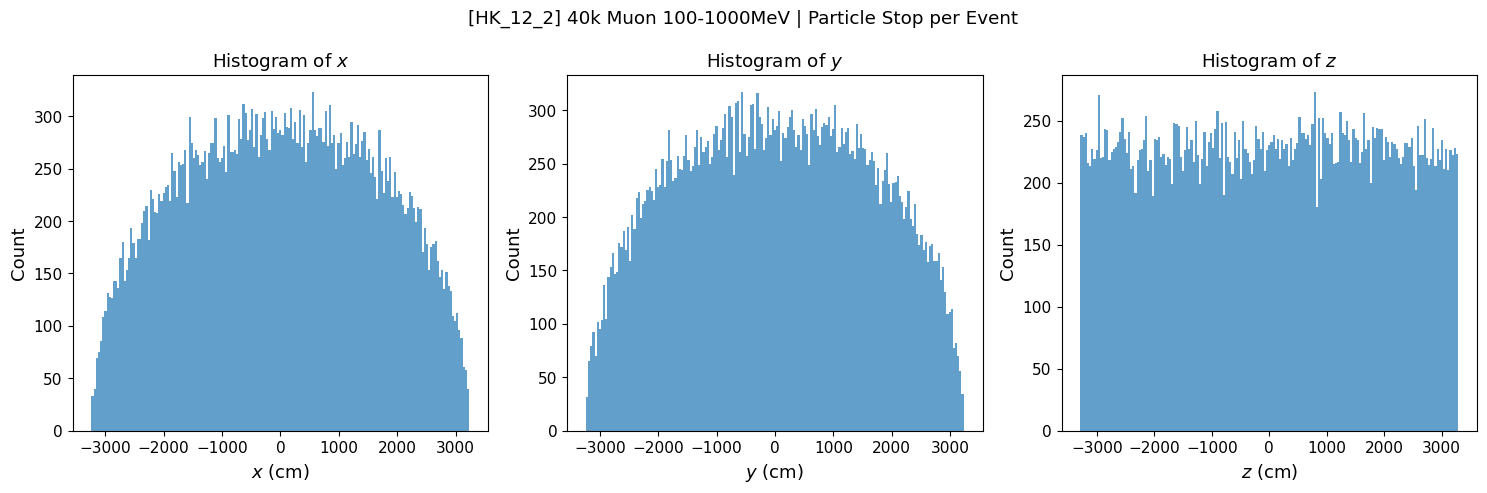

In [ ]:
fig_title = '[HK_12_2] 40k Muon 100-1000MeV | Particle Stop per Event'

alpha=0.7
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(particle_stop[:, 0], bins=175, alpha=0.7)
plt.xlabel(r'$x$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $x$')

plt.subplot(1, 3, 2)
plt.hist(particle_stop[:, 1], bins=175, alpha=0.7)
plt.xlabel(r'$y$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $y$')

plt.subplot(1, 3, 3)
plt.hist(particle_stop[:, 2], bins=175, alpha=0.7)
plt.xlabel(r'$z$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $z$')

plt.suptitle(fig_title)
plt.tight_layout()
plt.show()

# PMTs level

### -- Hits

In [19]:
hitx, hity, hitz = ak.flatten(tree['hitx']), ak.flatten(tree['hity']), ak.flatten(tree['hitz'])
edges_hitx, edges_hity, edges_hitz = np.histogram_bin_edges(hitx, bins='auto'), np.histogram_bin_edges(hity, bins='auto'), np.histogram_bin_edges(hitz, bins='auto')

f"Nombre total de hitx : {len(hitx)} hit" 

'Nombre total de hitx : 66602504 hit'

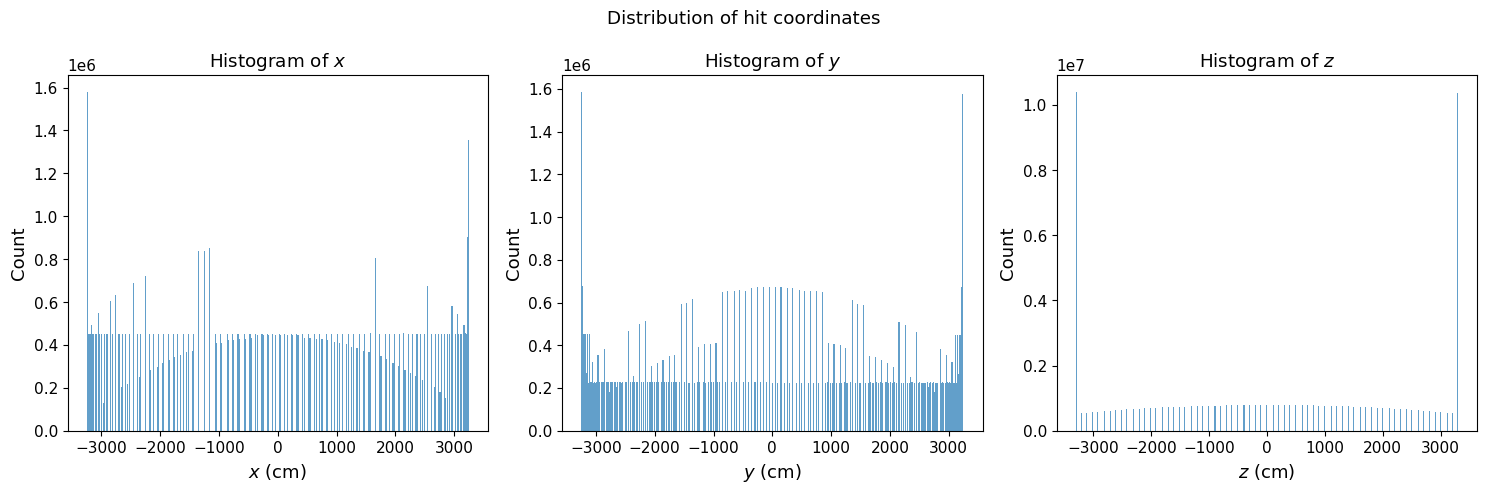

In [20]:
alpha=0.7
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(hitx, bins=edges_hitx, alpha=0.7)
plt.xlabel(r'$x$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $x$')

plt.subplot(1, 3, 2)
plt.hist(hity, bins=edges_hity, alpha=0.7)
plt.xlabel(r'$y$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $y$')

plt.subplot(1, 3, 3)
plt.hist(hitz, bins=edges_hitz, alpha=0.7)
plt.xlabel(r'$z$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $z$')

plt.suptitle('Distribution of hit coordinates')
plt.tight_layout()
plt.show()

## -- Charge

In [40]:
charge = ak.flatten(tree['charge'].array()).to_numpy()

edges_charge = np.histogram_bin_edges(np.log10(charge), bins='auto')

len(edges_charge)

1606

In [117]:
len(charge), len(charge[charge < 0.05])

(17655053, 11339)

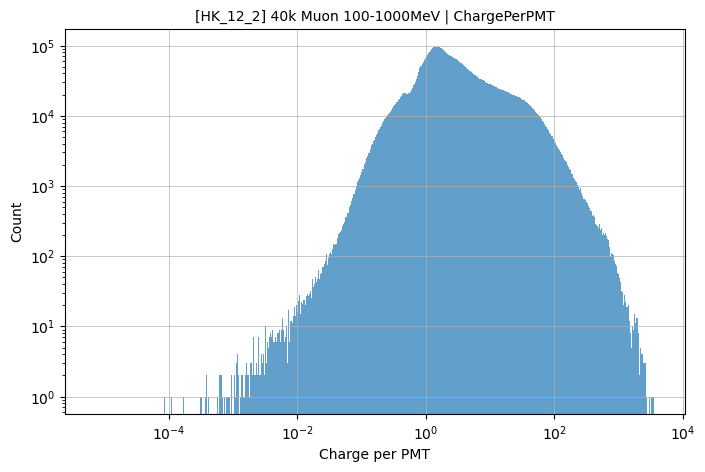

In [41]:
fig_title = '[HK_12_2] 40k Muon 100-1000MeV | ChargePerPMT'

figure = plt.figure(figsize=(8, 5))
plt.title(fig_title, fontsize=10)
plt.xlabel('Charge per PMT')
plt.ylabel('Count')

plt.hist(charge, bins=10**edges_charge, alpha=0.7)

plt.xscale('log')
plt.yscale('log')
plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.7) 
plt.show()

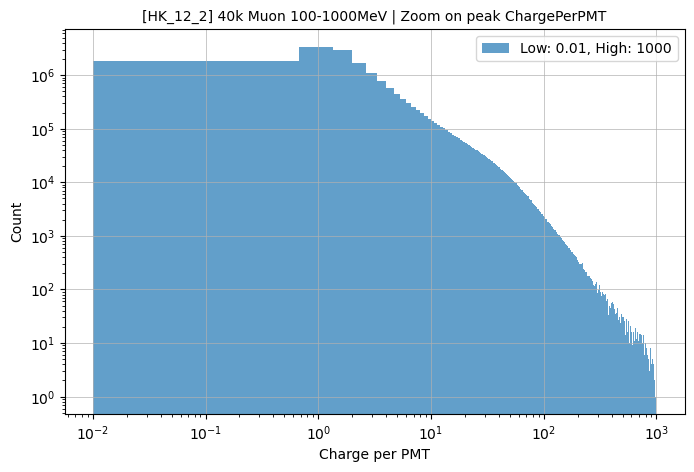

In [102]:
low_value, high_value = 0.01, 1000
peak_zoomed_charge = charge[ ( charge > low_value ) * ( charge < high_value ) ]

fig_title = '[HK_12_2] 40k Muon 100-1000MeV | Zoom on peak ChargePerPMT'

figure = plt.figure(figsize=(8, 5))
plt.title(fig_title, fontsize=10)

plt.hist(peak_zoomed_charge, bins=1500, alpha=0.7, label=f'Low: {low_value}, High: {high_value}')
plt.xlabel('Charge per PMT')
plt.ylabel('Count')

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.7) 
plt.legend()

#plt.ylim(300, 100100)
plt.xscale('log')
plt.yscale('log')

plt.show()

## -- Time

In [48]:
np.unique(tree['nb_triggers_in_event'].array(), return_counts=True)

<Array [[1], [40000]] type='2 * var * int64'>

In [82]:
time = ak.flatten(tree['time'].array())
np.min(time), np.max(time)

(-507.3, 38838936000.0)

In [119]:
len(time), len(time[time < -250 ]) + len(time[time > 400])

(17655053, 69408)

In [95]:
low_t, high_t = -400, 400

sub_time = time[ ( time >= low_t ) * ( time < high_t ) ]

np.min(sub_time), np.max(sub_time)

(-400.0, 399.9)

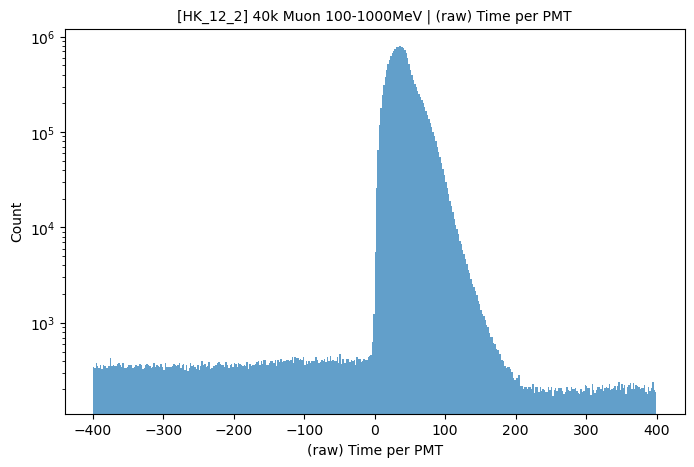

In [96]:
fig_title = '[HK_12_2] 40k Muon 100-1000MeV | (raw) Time per PMT'

figure = plt.figure(figsize=(8, 5))
plt.title(fig_title, fontsize=10)

plt.hist(sub_time, bins=400, alpha=0.7)
plt.xlabel('(raw) Time per PMT')
plt.ylabel('Count')

#plt.xscale('log')
plt.yscale('log')

plt.show()